# Análisis exploratorio de datos
El análisis exploratorio de datos se conoce como EDA (exploratory data analysis).


## Objetivos
1. Presentar las principales librerías de Python para análisis exploratorio de datos y recursos visuales.
2. Introducir y familiarizarse con la lectura y la exploración de datasets, permitiendo identificar límites y potencial de los datos así como su adecuación para el análisis.

## Datasets
Datos abiertos del GCBA. Ministerio de Salud. Instituto de Trasplantes de la Ciudad de Buenos Aires. Los descargamos de [aquí]('https://data.buenosaires.gob.ar/dataset/manifestaciones-a-la-donacion-para-trasplantes').

**Manifestaciones a la donación para trasplantes**
Información correspondiente a la Campaña de Promoción “Hoy también elegís ser donante de órganos” organizada por el Instituto de Trasplante de la Ciudad de Buenos Aires en el marco de la jornada electoral **PASO 2017** dando cumplimiento a la Ley 2508/07. Se realizó en 62 establecimientos autorizados por la Justicia Electoral de la Ciudad de Buenos Aires.

1. *Manifestaciones a la donación para trasplantes*: personas que decidieron sobre la donación de órganos y tejidos en la CABA durante las Elecciones PASO 2017.

2. *Establecimentos - Elecciones 2017*: ubicación de los establecimientos autorizados para las Elecciones Legislativas de Octubre 2017.

Para manejar y obtener información de los datasets, necesitaremos importar algunas librerías, que se agregan a la ya mencionada Pandas. Son: __Numpy, Scipy y Seaborn__. La referencia a las mismas podés encontrarla en el README del repositorio

In [6]:
#importamos las librerias con las que trabajaremos
import numpy as np
from scipy import stats

import pandas as pd
import seaborn as sns

### Personas que se expresaron frente a la donación de órganos


In [11]:
# este bloque es exclusivo para trabajar en COLAB! Quitá el comentario de las dos lineas de abajo para que se ejecuten!
# se habilita un botón que tenés que pulsar para seleccionar tu archivo de un directorio local

#from google.colab import files
#files.upload()

Pandas contiene un método llamado `read_csv()`, que enviando como string una dirección de un archivo csv, levanta automáticamente todos los datos de ese archivo en un Dataframe

In [12]:
# cargamos el dataset, instanciándolo para poder referenciarlo luego
data = pd.read_csv('datasets/manifestaciones-a-la-donacion-para-trasplantes.csv', sep=';')

# visualizamos que se haya cargado bien
data.head()

,NACIONALIDAD,SEXO,EDAD,CONSENTIMIENTO,CUALQUIER_ORGANO,CUALES_NO,TRASPLANTE,INVESTIGACION,COMUNA
0,ARGENTINA,F,40,SI,SI,NaN,SI,SI,2
1,ARGENTINA,M,31,SI,SI,NaN,SI,NO,2
2,ARGENTINA,F,41,SI,SI,NaN,SI,SI,2
3,ARGENTINA,M,29,SI,SI,NaN,SI,NO,2
4,ARGENTINA,F,26,SI,SI,NaN,SI,NO,2


In [13]:
# chequamos dimensiones, estructura, contenido
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 9 columns):
NACIONALIDAD        1502 non-null object
SEXO                1502 non-null object
EDAD                1502 non-null int64
CONSENTIMIENTO      1502 non-null object
CUALQUIER_ORGANO    1502 non-null object
CUALES_NO           14 non-null object
TRASPLANTE          1502 non-null object
INVESTIGACION       1502 non-null object
COMUNA              1502 non-null int64
dtypes: int64(2), object(7)
memory usage: 64.6+ KB


Según `.info()`:
* ¿Cómo identificarías si hay datos vacíos?
* ¿Podés decir que el dataset está bien organizado? ¿Por qué?
* ¿Eliminarías alguna fila o alguna columna?
* ¿Transformarías algún dato? 
* ¿Ya podrías analizarlo?
* Observando el dataset (su estructura, el nombre de las columnas, características de las respuestas, etc.), ¿cómo lo caracterizarías? ¿qué tipo de preguntas podrías responder?

In [14]:
# qué hace .describe()? 
# qué tipos de datos lee?
data.describe()

,EDAD,COMUNA
count,1502.000000,1502.000000
mean,42.914780,8.032623
std,15.259494,4.407416
min,18.000000,1.000000
25%,30.000000,4.000000
50%,41.000000,8.000000
75%,54.000000,12.000000
max,99.000000,15.000000


In [31]:
# esta expresión genera un booleano sobre la serie/variable/columna que le pasamos
lista=data['CONSENTIMIENTO']=='SI'
lista.head(5) #visualizar registros

0    True
1    True
2    True
3    True
4    True
Name: CONSENTIMIENTO, dtype: bool

In [33]:
# empleamos la condición de arriba para seleccionar aquellos casos/registros/filas que cumplan con esa condición
# aquí hacemos la selección sobre la misma columna
# alternativamente se podría utilizar otra columna o el dataset completo, depende de lo que busquemos identificar!
data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI'].sample(5)

530     SI
621     SI
1068    SI
1399    SI
1424    SI
Name: CONSENTIMIENTO, dtype: object

Como vimos, las expresiones `.head()` y `.sample()` obtienen una cantidad limitada de los registros que figuran en _data_. Head retorna los primeros N elementos de data, mientras que sample retorna una cantidad de elementos de manera aleatoria

Con la función built in `.count()` retorna la cantidad de registros que tiene un Dataframe

In [35]:
data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI'].count()

1486

In [36]:
# aquí utilizamos esa construcción para contar respuestas afirmativas y negativas, guardando el resultado en memoria
donan = data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI'].count()
no_donan = data['CONSENTIMIENTO'][data['CONSENTIMIENTO']!='SI'].count()

# con ello, realizamos una operación que resuma la información
print('porcentaje de donantes: ', round(donan/len(data)*100,2))

porcentaje de donantes:  98.93


In [37]:
data['CUALQUIER_ORGANO'][data['CUALQUIER_ORGANO']!='SI'].count()

30

In [38]:
# .notnull() también opera como un booleano
# con la misma lógica que antes, podemos seleccionar aquellas filas cuya respuesta presenta alguna especificación
data['CUALES_NO'][data['CUALES_NO'].notnull()]

59             HIGADO-CORNEAS
233      RIÑON-HIGADO-CORNEAS
234              HIGADO-RIÑON
326                      OJOS
432                   CORNEAS
433       CORNEAS-PIEL-HUESOS
528                   CORNEAS
529       CORNEAS-PIEL-HUESOS
648       HIGADO-RIÑON-PULMON
883     RIÑON-CORNEAS-CORAZON
914               PIEL-HUESOS
1002                  TEJIDOS
1013                     PIEL
1434                  CORNEAS
Name: CUALES_NO, dtype: object

In [39]:
# vemos que hay 16 personas que no dieron consentimiento para donación
# también hay 16 que no aceptaron donar para trasplante
# serán los mismos? qué podés decir a partir de este output?
data['TRASPLANTE'][data['TRASPLANTE']!='SI'] == data['CONSENTIMIENTO'][data['CONSENTIMIENTO']!='SI']

82      True
83      True
96      True
119     True
120     True
121     True
122     True
132     True
133     True
167     True
556     True
1371    True
1381    True
1382    True
1383    True
1388    True
dtype: bool

In [40]:
data['INVESTIGACION'][data['INVESTIGACION']!='SI'].count()

909

#### Retomemos la exploración de las variables numéricas
Con funciones propias de la estadística descriptiva, obtendremos información acerca de las características de los encuestados

In [42]:
print('casos: ', len(data))
print('promedio: ', round(data['EDAD'].mean(),2))
print('mediana: ', round(data['EDAD'].median(),2))
print('moda: ', stats.mode(data['EDAD'])[0][0]) # SciPy & índices/subíndices
print('desvío estándar: ', round(data['EDAD'].std(),2))

casos:  1502
promedio:  42.91
mediana:  41.0
moda:  29
desvío estándar:  15.26


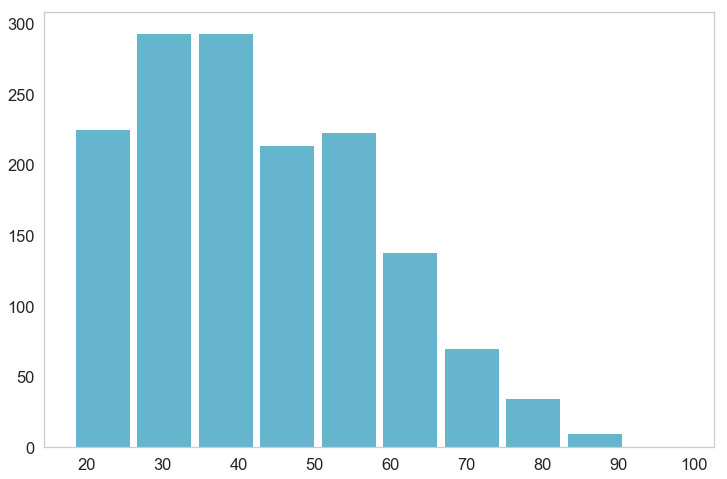

In [45]:
# aquí graficamos la forma que cobra la frecuencia de la variable EDAD
# utilizamos un método propio de PANDAS para plotear histogramas
data['EDAD'].hist(bins=10, grid=False, figsize=(12,8), color='c', rwidth=0.9);

En el próximo bloque de código aparece por primera vez la librería __SEABORN__. Ésta tiene por objetivo mejorar la interfaz de los distintos gráficos y estadísticas generadas en nuestro Notebook. Luego de eso, nuevamente llamo a graficar los datos en el documento, probablemente el histograma aparezca diferente...

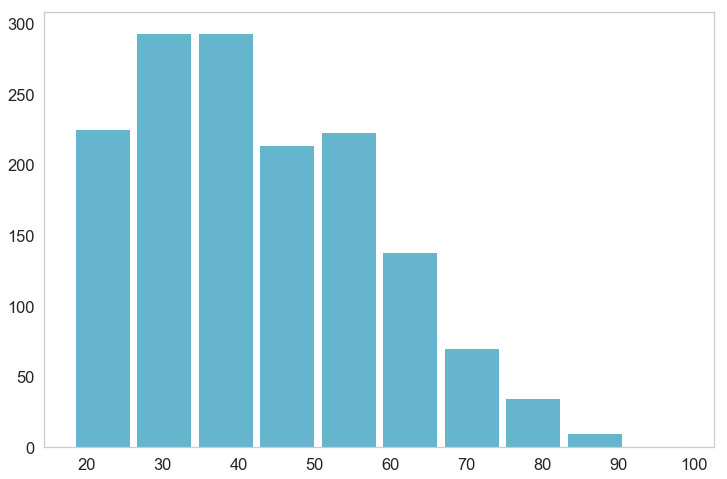

In [47]:
sns.set(style='whitegrid', font_scale=1.5)
data['EDAD'].hist(bins=10, grid=False, figsize=(12,8), color='c', rwidth=0.9);

Continuemos aprendiendo y utilizando diferentes funciones que proveen las librerías de DataScience de Python para obtener información relevante del dataset

In [48]:
data['NACIONALIDAD'].unique()
#devolverá un listado con los elementos de la columna Nacionalidad sin repetir

array(['ARGENTINA', 'CHILENA', 'PERUANA', 'URUGUAYA', 'ESPAÑOLA',
       'PARAGUAYA', 'BOLIVIANA', 'CANADIENSE', 'BRASILERA', 'VENEZOLANA',
       'ITALIANA', 'MEXICANA', 'COLOMBIANA', 'FINLANDESA'], dtype=object)

In [49]:
data['NACIONALIDAD'].value_counts()
#muestra un listado con la cantidad de personas por nacionalidad

ARGENTINA     1448
PARAGUAYA       16
URUGUAYA        13
BRASILERA        5
CHILENA          3
BOLIVIANA        3
PERUANA          3
ITALIANA         2
VENEZOLANA       2
ESPAÑOLA         2
MEXICANA         2
CANADIENSE       1
FINLANDESA       1
COLOMBIANA       1
Name: NACIONALIDAD, dtype: int64

In [50]:
# veamos qué particularidades tienen quienes no serán donantes
data.loc[data['CONSENTIMIENTO']!='SI',['NACIONALIDAD', 'SEXO', 'EDAD', 'COMUNA']]

,NACIONALIDAD,SEXO,EDAD,COMUNA
82,ARGENTINA,F,24,8
83,ARGENTINA,F,37,4
96,ARGENTINA,F,36,1
119,ARGENTINA,M,18,4
120,PERUANA,F,38,4
121,ARGENTINA,M,37,4
122,ARGENTINA,F,34,4
132,ARGENTINA,M,51,6
133,ARGENTINA,F,82,6
167,ARGENTINA,M,46,4


¿Todos argentinos?... Qué mal...
A partir de esto, conociendo los datos, y utilizando ciertas habilidades como __GROUP BY__ (que funciona exactamente igual que como lo hemos visto con una Base de datos SQL, podemos definir nuevos valores relevantes. 

In [52]:
data.loc[data['CONSENTIMIENTO']!='SI',['NACIONALIDAD', 'SEXO', 'EDAD', 'COMUNA']].groupby(['NACIONALIDAD','SEXO']).count()

EDAD  COMUNA
NACIONALIDAD SEXO              
ARGENTINA    F        9       9
             M        6       6
PERUANA      F        1       1

### Establecimientos

In [53]:
# subimos el archivo, si estamos en el entorno Colaboratory
#from google.colab import files
#files.upload()

In [54]:
comunas = pd.read_csv('datasets/establecimentos-elecciones-2017.csv', sep=';', encoding='utf8')

Una vez que pudiste acceder a las columnas:

¿Qué información nos puede servir para complementar el primer dataset?
¿Se pueden integrar facilmente los dos datasets? ¿Tienen las mismas dimensiones? ¿Cómo se podrían vincular?

In [55]:
# vamos a parsear los datos de la comuna
# para poder generar una equivalencia entre las columnas 'COMUNA' de un df y otro, tenemos que adaptarlas
# por lo tanto, quitamos la palabra 'COMUNA' de cada celda, preservando el número
comunas['COMUNA'] = comunas['COMUNA'].apply(lambda x: x.replace('COMUNA','')).astype(int)

In [56]:
# acá tenemos a las columnas candidatas para el parseo
# está todo bien en los datos?
comunas[['BARRIO','COMUNA']]

,BARRIO,COMUNA
0,RECOLETA,2
1,RECOLETA,2
2,BOEDO,5
3,ALMAGRO,5
4,VILLA LURO,10
5,VILLA DEVOTO,11
6,COGHLAN,12
7,COLEGIALES,13
8,PALERMO,14
9,RECOLETA,2


In [57]:
# vamos a llevar ese subset a un diccionario para que las KEYS sean para el matching con el df DATA y los VALUE operen como etiquetas
ref = { k:v for v,k in zip(comunas['BARRIO'],comunas['COMUNA'])}
ref

{2: 'RECOLETA',
 5: 'ALMAGRO',
 10: 'VILLA LURO',
 11: 'VILLA DEVOTO',
 12: 'COGHLAN',
 13: 'COLEGIALES',
 14: 'PALERMO'}

¿La información está completa? ¿Perdimos algo en el camino?

In [59]:
# notaste que había 2 establecimientos en la comuna 5, uno en Almagro y otro en Boedo
# como en nuestro df DATA no podemos diferenciarlos, incluimos ambos a la referencia y la actualizamos
ref.update({5 : 'ALMAGRO/BOEDO'})
ref

{2: 'RECOLETA',
 5: 'ALMAGRO/BOEDO',
 10: 'VILLA LURO',
 11: 'VILLA DEVOTO',
 12: 'COGHLAN',
 13: 'COLEGIALES',
 14: 'PALERMO'}

In [60]:
# cuando al .map() le pasamos un diccionario cuyas claves generan equivalencias con los valores de cqada registro...
# es posible etiquetar o renombrar el contenido de cada celda 
data['COMUNA'].map(ref)[-15:]

1487    COLEGIALES
1488    COLEGIALES
1489    COLEGIALES
1490       PALERMO
1491       PALERMO
1492       PALERMO
1493       PALERMO
1494       PALERMO
1495       PALERMO
1496       PALERMO
1497    VILLA LURO
1498    VILLA LURO
1499    VILLA LURO
1500    VILLA LURO
1501    VILLA LURO
Name: COMUNA, dtype: object

In [61]:
# aquí guardamos ese reetiquetado en una nueva columna para no perder información
data['COMUNA2'] = data['COMUNA'].map(ref)

In [62]:
data.columns

Index(['NACIONALIDAD', 'SEXO', 'EDAD', 'CONSENTIMIENTO', 'CUALQUIER_ORGANO',
       'CUALES_NO', 'TRASPLANTE', 'INVESTIGACION', 'COMUNA', 'COMUNA2'],
      dtype='object')

In [63]:
x = data.groupby(['CONSENTIMIENTO','SEXO']).count()
x

NACIONALIDAD  EDAD  CUALQUIER_ORGANO  CUALES_NO  \
CONSENTIMIENTO SEXO                                                    
NO             F               10    10                10          0   
               M                6     6                 6          0   
SI             F             1062  1062              1062          8   
               M              424   424               424          6   

                     TRASPLANTE  INVESTIGACION  COMUNA  COMUNA2  
CONSENTIMIENTO SEXO                                              
NO             F             10             10      10        1  
               M              6              6       6        0  
SI             F           1062           1062    1062      455  
               M            424            424     424      180

In [65]:
categorias = ['SEXO', 'CONSENTIMIENTO', 'INVESTIGACION']

# excluyo 
# NACIONALIDAD y COMUNA (quiero conservar sus etiquetas)
# EDAD (ya numérica)
# CUALES_NO (14 casos, detalle arriba)
# CUALQUIER_ORGANO_SI (30 con NO)
# TRASPLANTE (es redundante)

for i in categorias:
    print(data[i].unique())

['F' 'M']
['SI' 'NO']
['SI' 'NO']


In [67]:
# generamos un df de variables dummies (datos numéricos binarios [0, 1]) para facilitar algunos procedimientos 
dummies = pd.get_dummies(data[categorias])

In [68]:
# armamos selecciones de las columnas que nos interesa conservar en un nuevo df, ya integrado
data_seleccion = ['NACIONALIDAD', 'EDAD', 'COMUNA', 'COMUNA2']
dummies_seleccion = ['SEXO_F', 'CONSENTIMIENTO_SI', 'INVESTIGACION_SI']

#construimos el nuevo df, con partes de cada uno de los df existentes
newdata = data[data_seleccion].join(dummies[dummies_seleccion])
newdata.head()

,NACIONALIDAD,EDAD,COMUNA,COMUNA2,SEXO_F,CONSENTIMIENTO_SI,INVESTIGACION_SI
0,ARGENTINA,40,2,RECOLETA,1,1,1
1,ARGENTINA,31,2,RECOLETA,0,1,0
2,ARGENTINA,41,2,RECOLETA,1,1,1
3,ARGENTINA,29,2,RECOLETA,0,1,0
4,ARGENTINA,26,2,RECOLETA,1,1,0


In [69]:
# chequeamos estructura de los datos por comuna
newdata['COMUNA2'].value_counts(normalize=True, sort=True, ascending=False, dropna=False)*100

NaN              57.656458
ALMAGRO/BOEDO     8.455393
COLEGIALES        7.856192
RECOLETA          6.058589
COGHLAN           5.858855
PALERMO           5.659121
VILLA DEVOTO      4.860186
VILLA LURO        3.595206
Name: COMUNA2, dtype: float64

¿Habías notado que prácticamente la mitad de las comunas no estaba categorizada o carecía de establecimiento de referencia? 
De hecho, más de la mitad de la información al respecto no ha sido disponibilizada! 


### Desafío
Una alternativa para resulver este tema es armar un diccionario propio para el parseo, completo. Podés recurrir al GCBA o a Wikipedia para armar una lista completa de las referencias por comuna { número : barrios afectados } y reescribir la columna 'COMUNA 2'. 

In [70]:
# cómo comenzarías?
# escribí el código acá abajo!


En este caso, es difícil por la conglomeración de dummies. De hechom muchos puntos se apilan en el mismo par ordenado. De ahí que nos conviene graficar las series con histograms o swarmplots. 

[Aquí](https://seaborn.pydata.org/generated/seaborn.pairplot.html) también podés ver algunos ejemplos de datos más funcionales para el pairplot.

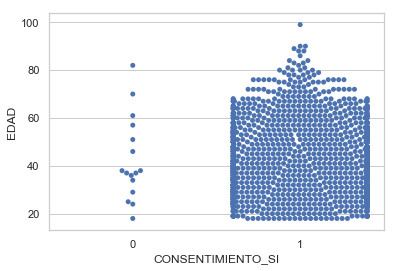

In [73]:
sns.set(style='whitegrid', font_scale=1)
sns.swarmplot(y='EDAD', x='CONSENTIMIENTO_SI', data=newdata, color='b');

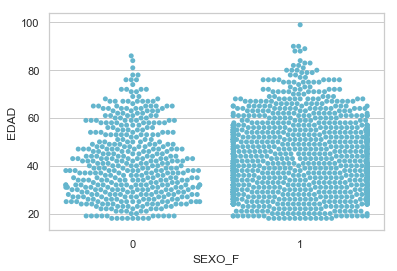

In [74]:
sns.swarmplot(y='EDAD', x='SEXO_F', data=newdata, color='c');